In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import keras 
import tensorflow as tf
from keras.layers import Dropout,Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
#task 1 & 2
#reading and cleaning data
#reading training set
training_set=pd.read_csv('/content/UNSW_NB15_training-set.csv')
#cleaning training set
training_set.dropna(inplace=True,axis=1) #dropping n/a values from training set
training_set=training_set.fillna(method='ffill') 
out_training_set= training_set.iloc[:,-1] #last column training data are labels
training_set

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0


In [3]:
#reading testing set
testing_set=pd.read_csv('/content/UNSW_NB15_testing-set.csv')
#cleaning testing set
testing_set.dropna(inplace=True,axis=1) #dropping n/a values from columns
testing_set=testing_set.fillna(method='ffill')
out_testing_set= testing_set.iloc[:,-1] #last column of testing set are also labels
out_testing_set
testing_set
data = pd.concat([training_set,testing_set]).reset_index(drop=True) #concatinated training and 
                                                       #testing set

data_output = pd.concat([out_training_set,out_testing_set]).reset_index(drop=True) #concatinated training and testing output
data_output

0         0
1         0
2         0
3         0
4         0
         ..
257668    1
257669    1
257670    1
257671    1
257672    1
Name: label, Length: 257673, dtype: int64

In [4]:
#task 3
#describing dataset
des= data.describe()
corr= data.corr(method ='pearson') #finding correlation of data by pesrson method

attack_cat=data['attack_cat']
unique_attack= attack_cat.unique() #finding all types of possible attacks categories in dataset
service= data['service']
unique_service=service.unique() # all possible service categories in dataset
proto=data['proto']
unique_proto= proto.unique() #all possible protocols in dataset
corr

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
id,1.000000,0.019190,-0.049479,-0.090849,0.000928,-0.058138,0.263971,0.447072,-0.014507,0.111997,-0.265091,-0.013494,-0.071962,0.040889,-0.014791,-0.005448,-0.052804,-0.284825,-0.222179,-0.220881,-0.282189,0.023274,0.018711,0.025227,-0.046555,-0.267917,-0.014368,-0.016168,0.287113,0.427660,0.285409,0.333293,0.384414,0.350075,-0.022946,-0.023102,-0.014324,0.254178,0.289870,0.045963,0.490584
dur,0.019190,1.000000,0.258890,0.188382,0.204422,0.149705,-0.118622,0.008617,0.053580,-0.079202,-0.049026,0.207223,0.148506,0.080213,0.145803,0.140108,0.158852,0.035650,0.019954,0.021371,0.027009,0.055182,0.050478,0.052618,0.088972,0.029999,0.003041,0.078497,-0.106030,0.156859,-0.080883,-0.090267,-0.088422,-0.090921,0.020390,0.020330,0.023299,-0.079126,-0.107793,0.034025,0.029096
spkts,-0.049479,0.258890,1.000000,0.383221,0.964393,0.203804,-0.073668,-0.099579,0.063234,-0.049232,0.075482,0.971859,0.204711,-0.016597,-0.002348,-0.001192,0.015201,0.124898,0.099473,0.096786,0.127331,0.026433,0.020946,0.029008,0.209004,0.147472,0.008288,0.085979,-0.065800,-0.081957,-0.056025,-0.063234,-0.066604,-0.072036,0.010114,0.010135,0.004430,-0.057480,-0.066118,-0.016565,-0.043040
dpkts,-0.090849,0.188382,0.383221,1.000000,0.184280,0.973445,-0.093065,-0.183142,0.047416,-0.062484,0.137395,0.199640,0.979612,-0.020490,-0.006820,-0.001411,0.048144,0.168999,0.132411,0.130523,0.172427,0.008644,0.003410,0.013534,0.013921,0.426542,0.028034,0.414217,-0.073659,-0.140279,-0.065177,-0.078324,-0.084943,-0.087176,0.013203,0.013231,0.039567,-0.069019,-0.073238,-0.019895,-0.097394
sbytes,0.000928,0.204422,0.964393,0.184280,1.000000,0.009969,-0.027353,-0.019939,0.058397,-0.017320,-0.007372,0.995772,0.006907,-0.006187,-0.000552,-0.002295,-0.003358,0.047363,0.038394,0.036309,0.048363,0.031943,0.026179,0.034037,0.224094,-0.004396,0.002648,0.001631,-0.033051,-0.010485,-0.025157,-0.024496,-0.024965,-0.029291,-0.003931,-0.003929,-0.002900,-0.025494,-0.033095,-0.005903,0.019376
dbytes,-0.058138,0.149705,0.203804,0.973445,0.009969,1.000000,-0.055538,-0.128600,0.019371,-0.037318,0.103487,0.016448,0.996711,-0.012459,-0.007564,-0.003541,0.041703,0.102575,0.079053,0.077746,0.104619,-0.003374,-0.006773,0.001120,-0.034618,0.405260,0.029853,0.441155,-0.041784,-0.084006,-0.038026,-0.046258,-0.050583,-0.050668,-0.009145,-0.009139,0.042458,-0.041286,-0.041118,-0.011842,-0.060403
rate,0.263971,-0.118622,-0.073668,-0.093065,-0.027353,-0.055538,1.000000,0.400967,-0.426766,0.587503,-0.148204,-0.041993,-0.070734,-0.072414,-0.051443,-0.062517,-0.084274,-0.521469,-0.414825,-0.414522,-0.528679,-0.281906,-0.249840,-0.278257,-0.112170,-0.268470,-0.081732,-0.022513,0.359295,0.417419,0.315193,0.350931,0.383672,0.376051,-0.062572,-0.062543,-0.110000,0.316011,0.364168,-0.068433,0.335883
sttl,0.447072,0.008617,-0.099579,-0.183142,-0.019939,-0.128600,0.400967,1.000000,-0.032471,0.269001,-0.393943,-0.042622,-0.154402,-0.198489,-0.004191,0.025304,-0.111839,-0.400909,-0.326553,-0.324231,-0.415248,0.016582,0.016055,0.014768,-0.006414,-0.544706,-0.077859,-0.051030,0.334824,0.631431,0.254498,0.325302,0.358632,0.380792,-0.114584,-0.114647,-0.131152,0.261206,0.328775,-0.210860,0.624082
dttl,-0.014507,0.053580,0.063234,0.047416,0.058397,0.019371,-0.426766,-0.032471,1.000000,-0.285242,-0.124192,0.070323,0.030394,-0.080502,0.095347,0.144802,0.104029,0.748293,0.599284,0.601353,0.763755,0.730500,0.645714,0.723035,0.185640,0.128556,0.151791,0.012978,-0.424964,-0.248080,-0.380788,-0.361507,-0.380438,-0.392213,0.089394,0.089009,0.217831,-0.378975,-0.437934,-0.090447,0.019369
sload,0.111997,-0.079202,-0.049232,-0.062484,-0.017320,-0.037318,0.587503,0.269001,-0.285242,1.000000,-0.1

In [5]:
#Task 4
#Machine learning model
# step 1: preprocessing data for training
data=data.drop(['attack_cat','id','label'],axis=1)#removing undesired column from input
data
cols_cat = data.select_dtypes('object').columns #selecting strings type data
cols_numeric = data._get_numeric_data().columns #selecting numeric type data
data['service']= np.where(data['service'] == '-', 'None', data['service']) #replacing _ with none in service,
data['proto']= np.where(data['proto'] == '-', 'None', data['proto'])       #proto and
data['state']= np.where(data['state'] == '-', 'None', data['state'])       #state columns
data
data = pd.get_dummies(data,columns=cols_cat)  #converting string data into one hot encoder
data
cols_numeric = list(cols_numeric) 
data[cols_numeric] = data[cols_numeric].astype('float32')
#data normalizing of numerical columns
data[cols_numeric] = (data[cols_numeric] - np.min(data[cols_numeric])) / np.std(data[cols_numeric])
data

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_3pc,...,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_None,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1.841194e-06,0.007357,0.000000,0.002718,0.000000,0.566956,2.480177,0.000000,0.970703,0.000000,0.000000,0.000000,1.588145e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088705,0.000000,0.0,0.0,0.092342,2.015641,0.000000,0.000000,0.000000,0.089897,0.0,0.0,0.0,0.000000,0.091967,0.0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.339050e-06,0.007357,0.000000,0.010009,0.000000,0.779565,2.480177,0.000000,4.741474,0.000000,0.000000,0.000000,1.155015e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.165268,0.000000,0.0,0.0,0.092342,2.015641,0.000000,0.000000,0.000000,0.089897,0.0,0.0,0.0,0.000000,0.091967,0.0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8.369064e-07,0.007357,0.000000,0.006012,0.000000,1.247304,2.480177,0.000000,4.598315,0.000000,0.000000,0.000000,7.218842e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.478748,0.000000,0.0,0.0,0.184683,2.015641,0.000000,0.000000,0.000000,0.179793,0.0,0.0,0.0,0.000000,0.183935,0.0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.004288e-06,0.007357,0.000000,0.005045,0.000000,1.039420,2.480177,0.000000,3.229154,0.000000,0.000000,0.000000,8.662611e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.070483,0.000000,0.0,0.0,0.184683,2.015641,0.122321,0.122526,0.000000,0.179793,0.0,0.0,0.0,0.119108,0.183935,0.0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.673813e-06,0.007357,0.000000,0.012105,0.000000,0.623652,2.480177,0.000000,4.576787,0.000000,0.000000,0.000000,1.443768e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.049841,0.000000,0.0,0.0,0.184683,2.015641,0.122321,0.122526,0.000000,0.179793,0.0,0.0,0.0,0.119108,0.183935,0.0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1.506432e-06,0.007357,0.000000,0.000518,0.000000,0.692946,2.480177,0.000000,0.272684,0.000000,0.000000,0.000000,1.299392e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160390,0.000000,0.0,0.0,2.123859,2.015641,2.813377,2.818090,2.057484,2.067625,0.0,0.0,0.0,2.739475,2.115250,0.0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
257669,8.465508e-02,0.066209,0.071509,0.003432,0.002424,0.000210,2.480177,2.235873,0.000048,0.002034,0.030529,0.018609,7.854117e-03,0.061257,0.075968,0.030608,2.003724,2.573645,2.530583,2.001352,1.070069,0.685464,1.368203,0.184691,0.173376,0.0,0.0,0.000000,1.007820,0.000000,0.000000,0.000000,0.089897,0.0,0.0,0.0,0.000000,0.000000,0.0,0,...,0,0,

In [6]:
# step 2: splitting into training and testing data
train_data=data[0:82332]
train_labels=data_output[0:82332]
test_data=data[82332:]
test_labels=data_output[82332:]
test_labels

82332     0
82333     0
82334     0
82335     0
82336     0
         ..
257668    1
257669    1
257670    1
257671    1
257672    1
Name: label, Length: 175341, dtype: int64

In [7]:
#step 3: Building deep learning model
model = Sequential()
# #First Hidden Layer
model.add(Dense(256, activation='relu', input_dim=train_data.shape[1]))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu' ))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
#model.summary()
model.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])
history = model.fit(train_data,train_labels, batch_size=64, epochs=15, 
                        validation_data=(test_data,test_labels))

Epoch 1/15
1287/1287 [==============================] - 29s 9ms/step - loss: 0.2453 - accuracy: 0.8879 - val_loss: 0.2811 - val_accuracy: 0.8933
Epoch 2/15
1287/1287 [==============================] - 16s 12ms/step - loss: 0.1353 - accuracy: 0.9459 - val_loss: 0.3922 - val_accuracy: 0.8589
Epoch 3/15
1287/1287 [==============================] - 16s 12ms/step - loss: 0.1225 - accuracy: 0.9531 - val_loss: 0.3565 - val_accuracy: 0.8845
Epoch 4/15
1287/1287 [==============================] - 11s 9ms/step - loss: 0.1224 - accuracy: 0.9563 - val_loss: 0.3863 - val_accuracy: 0.8731
Epoch 5/15
1287/1287 [==============================] - 11s 9ms/step - loss: 0.1165 - accuracy: 0.9579 - val_loss: 0.2980 - val_accuracy: 0.8978
Epoch 6/15
1287/1287 [==============================] - 16s 12ms/step - loss: 0.1201 - accuracy: 0.9578 - val_loss: 0.3070 - val_accuracy: 0.9013
Epoch 7/15
1287/1287 [==============================] - 11s 9ms/step - loss: 0.1145 - accuracy: 0.9583 - val_loss: 0.4483 - val

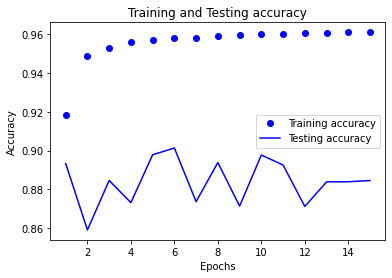

In [8]:
# step 4:plotting training and testing accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epochs=range(1,len(train_acc)+1)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, test_acc, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

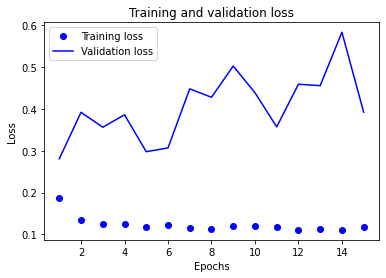

In [9]:
#step 5: plotting training and testing loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(1, len(test_loss)+1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
#Decision Tree Algorithm
tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_data, train_labels)
tree_preds_train = tree.predict(train_data)

tree_preds_test = tree.predict(test_data)
print ("Training Accuracy : ", accuracy_score(train_labels, tree_preds_train))
print ("Testing Accuracy  : ", accuracy_score(test_labels, tree_preds_test))

Training Accuracy :  0.9999271243259
Testing Accuracy  :  0.8917195635932269


In [26]:
#confusion matrix for decision tree
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, tree_preds)

array([[ 53895,   2105],
       [ 16881, 102460]])

In [28]:
#Random Forest Algorithm
forest = RandomForestClassifier(n_estimators = 2,random_state=30)
forest.fit(train_data, train_labels)
forest_preds_train= forest.predict(train_data)
forest_preds_test = forest.predict(test_data)
print ("Training Accuracy : ", accuracy_score(train_labels, forest_preds_train))
print ("Testing Accuracy  : ", accuracy_score(test_labels, forest_preds_test))

Training Accuracy :  0.9810158868969538
Testing Accuracy  :  0.8505711727433971


In [29]:
#confusion matrix for random forest
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, forest_preds)

array([[54794,  1206],
       [24995, 94346]])

In [30]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(train_data, train_labels)
naive_preds_train= naive.predict(train_data)
naive_preds_test = naive.predict(test_data)
print ("Training Accuracy is: ", accuracy_score(train_labels,naive_preds_train))
print ("Testing Accuracy is: ", accuracy_score(test_labels, naive_preds_test))

Training Accuracy is:  0.6547636398970024
Testing Accuracy is:  0.6247312379876926


In [31]:
#confusion matrix for naive bayes
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, naive_preds)

array([[55827,   173],
       [65627, 53714]])